In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The first exercise is about using Newton's method to find the cube roots of unity - find $z$ such that $z^3 = 1$. From the fundamental theorem of algebra, we know there must be exactly 3 complex roots since this is a degree 3 polynomial.

We start with Euler's equation
$$
e^{ix} = \cos x + i \sin x
$$

Raising $e^{ix}$ to the $n$th power where $n$ is an integer, we get from Euler's formula with $nx$ substituting for $x$
$$
(e^{ix})^n = e^{i(nx)} = \cos nx + i \sin nx
$$

Whenever $nx$ is an integer multiple of $2\pi$, we have
$$
\cos nx + i \sin nx = 1
$$

So
$$
e^{2\pi i \frac{k}{n}}
$$
is a root of 1 whenever $k/n = 0, 1, 2, \ldots$.

So the cube roots of unity are $1, e^{2\pi i/3}, e^{4\pi i/3}$. 

While we can do this analytically, the idea is to use Newton's method to find these roots, and in the process, discover some rather perplexing behavior of Newton's method.

In [2]:
from sympy import Symbol, exp, I, pi, N, expand
from sympy import init_printing 
init_printing()

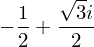

In [3]:
expand(exp(2*pi*I/3), complex=True)

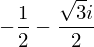

In [4]:
expand(exp(4*pi*I/3), complex=True)

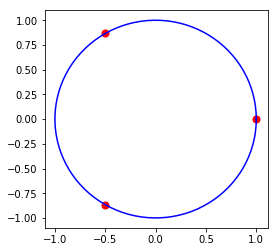

In [5]:
plt.figure(figsize=(4,4))
roots = np.array([[1,0], [-0.5, np.sqrt(3)/2], [-0.5, -np.sqrt(3)/2]])
plt.scatter(roots[:,0], roots[:,1], s=50, c='red')
xp = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(xp), np.sin(xp), c='blue');

**1**.  Newton's method for functions of complex variables - stability and basins of attraction. (30 points)

1. Write a function with the following function signature `newton(z, f, fprime, max_iter=100, tol=1e-6)` where
    - `z` is a starting value (a complex number e.g.  ` 3 + 4j`)
    - `f` is a function of `z`
    - `fprime` is the derivative of  `f`
The function will run until either max_iter is reached or the absolute value of the Newton step is less than tol. In either case, the function should return the number of iterations taken and the final value of `z` as a tuple (`i`, `z`). 

2. Define the function `f` and `fprime` that will result in Newton's method finding the cube roots of 1. Find 3 starting points that will give different roots, and print both the start and end points. 

Write the following two plotting functions to see some (pretty) aspects of Newton's algorithm in the complex plane.

3. The first function `plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv')` calculates and stores the number of iterations taken for convergence (or max_iter) for each point in a 2D array. The 2D array limits are given by `extent` - for example, when `extent = [-1,1,-1,1]` the corners of the plot are `(-i, -i), (1, -i), (1, i), (-1, i)`. There are `n` grid points in both the real and imaginary axes. The argument `cmap` specifies the color map to use - the suggested defaults are fine. Finally plot the image using `plt.imshow` - make sure the axis ticks are correctly scaled. Make a plot for the cube roots of 1.

4. The second function `plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet')` has the same arguments, but this time the grid stores the identity of the root that the starting point converged to. Make a plot for the cube roots of 1 - since there are 3 roots, there should be only 3 colors in the plot.

**2**.  Ill-conditioned linear problems. (20 points)

You are given a $n \times p$ design matrix $X$ and a $p$-vector of observations $y$ and asked to find the coefficients $\beta$ that solve the linear equations $X \beta = y$. 
```python
X = np.load('x.npy')
y = np.load('y.npy')
```

The solution $\beta$ can also be loaded as
```python
beta = np.load('b.npy')
```

- Write a formula that could solve the system of linear equations in terms of $X$ and $y$ Write a function `f1` that takes arguments $X$ and $y$ and returns $\beta$ using this formula.
- How could you code this formula using `np.linalg.solve` that does not require inverting a matrix? Write a function `f2` that takes arguments $X$ and $y$ and returns $\beta$ using this.
- Note that carefully designed algorithms *can* solve this ill-conditioned problem, which is why you should always use library functions for linear algebra rather than write your own.
```python
np.linalg.lstsq(x, y)[0]
```
- What happens if you try to solve for $\beta$ using `f1` or `f2`? Remove the column of $X$ that is making the matrix singular and find the $p-1$ vector $b$ using `f2`.
- Note that the solution differs from that given by `np.linalg.lstsq`? This arises because the relevant condition number for `f2` is actually for the matrix $X^TX$ while the condition number of `lstsq` is for the matrix $X$. Why is the condition so high even after removing the column that makes the matrix singular?

**3**. Consider the following function on $\mathbb{R}^2$:

$$f(x_1,x_2) = -x_1x_2e^{-\frac{(x_1^2+x_2^2)}{2}}$$

1. Write down its gradient.
2. write down the Hessian matrix. 
3. Find the critical points of $f$.
4. Characterize the critical points as max/min or neither. Find the minimum under the constraint 
$$g(x) = x_1^2+x_2^2 \leq 10$$
and 
$$h(x) = 2x_1 + 3x_2 = 5$$ using `scipy.optimize.minimize`.
5. Plot the function contours using `matplotlib`. (20 points)

**4**. One of the goals of the course it that you will be able to implement novel algorithms from the literature.  (30 points)

- Implement the mean-shift algorithm in 1D as described [here](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TUZEL1/MeanShift.pdf). 
    - Use the following function signature
    ```python
    def mean_shift(xs, x, kernel, max_iters=100, tol=1e-6):
    ```
    - xs is the data set, x is the starting location, and kernel is a kernel function
    - tol is the difference in $||x||$ across iterations
- Use the following kernels with bandwidth $h$ (a default value of 1.0 will work fine)
    - Flat - return 1 if $||x|| < h$ and 0 otherwise
    - Gaussian 
    $$\frac{1}{\sqrt{2 \pi h}}e^{\frac{-||x||^2}{h^2}}$$
    - Note that $||x||$ is the norm of the data point being evaluated minus the current value of $x$
- Use both kernels to find all 3 modes of the data set in `x1d.npy`
- Modify the algorithm and/or kernels so that it now works in an arbitrary number of dimensions.
- Use both kernels to find all 3 modes of the data set in `x2d.npy`
- Plot the path of successive intermediate solutions of the mean-shift algorithm starting from `x0 = (-4, 10)` until it converges onto a mode in the 2D data for each kernel. Superimpose the path on top of a contour plot of the data density.